In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import scanpy as sc
import pandas as pd
import scipy.sparse as sp

In [2]:
%%time 
adata = sc.read_h5ad("../../perturb_cite_seq_data/SCP1064/ready/control/gene_filtered_adata.h5ad")

CPU times: user 109 ms, sys: 102 ms, total: 212 ms
Wall time: 7.57 s


In [3]:
def generate_nodags_data(adata_path):
    adata = sc.read_h5ad(adata_path)
    data = sp.csr_matrix.toarray(adata.X)
    
    final_genes = adata.var.index
    
    datasets = []
    
    for gene in final_genes:
        datasets.append(
            data[adata.obs['targets'] == gene, :]
        )

    intervention_sets = [[i] for i in range(61)]
    
    return datasets, intervention_sets

    

In [4]:
control_datasets, control_interventions = generate_nodags_data("../../perturb_cite_seq_data/SCP1064/ready/control/gene_filtered_adata.h5ad")
cocult_datasets, cocult_interventions = generate_nodags_data("../../perturb_cite_seq_data/SCP1064/ready/cocult/gene_filtered_adata.h5ad")
ifn_datasets, ifn_interventions = generate_nodags_data("../../perturb_cite_seq_data/SCP1064/ready/ifn/gene_filtered_adata.h5ad")


In [5]:
control_training_data, control_training_interventions = control_datasets[:-6], control_interventions[:-6]
cocult_training_data, cocult_training_interventions = cocult_datasets[:-6], cocult_interventions[:-6]
ifn_training_data, ifn_training_interventions = ifn_datasets[:-6], ifn_interventions[:-6]

control_validation_data, control_validation_interventions = control_datasets[-6:], control_interventions[-6:]
cocult_validation_data, cocult_validation_interventions = cocult_datasets[-6:], cocult_interventions[-6:]
ifn_validation_data, ifn_validation_interventions = ifn_datasets[-6:], ifn_interventions[-6:]


In [6]:
# saving control data
for i, dataset in enumerate(control_training_data):
    np.save("../../perturb_cite_seq_data/nodags_data/control/training_data/dataset_{}.npy".format(i), dataset)
np.save("../../perturb_cite_seq_data/nodags_data/control/training_data/intervention_sets.npy", control_training_interventions)

for i, dataset in enumerate(control_validation_data):
    np.save("../../perturb_cite_seq_data/nodags_data/control/validation_data/dataset_{}.npy".format(i), dataset)
np.save("../../perturb_cite_seq_data/nodags_data/control/validation_data/intervention_sets.npy", control_validation_interventions)

In [7]:
# saving cocult data
for i, dataset in enumerate(cocult_training_data):
    np.save("../../perturb_cite_seq_data/nodags_data/cocult/training_data/dataset_{}.npy".format(i), dataset)
np.save("../../perturb_cite_seq_data/nodags_data/cocult/training_data/intervention_sets.npy", cocult_training_interventions)

for i, dataset in enumerate(cocult_validation_data):
    np.save("../../perturb_cite_seq_data/nodags_data/cocult/validation_data/dataset_{}.npy".format(i), dataset)
np.save("../../perturb_cite_seq_data/nodags_data/cocult/validation_data/intervention_sets.npy", cocult_validation_interventions)

In [8]:
# saving ifn data
for i, dataset in enumerate(ifn_training_data):
    np.save("../../perturb_cite_seq_data/nodags_data/ifn/training_data/dataset_{}.npy".format(i), dataset)
np.save("../../perturb_cite_seq_data/nodags_data/ifn/training_data/intervention_sets.npy", ifn_training_interventions)

for i, dataset in enumerate(ifn_validation_data):
    np.save("../../perturb_cite_seq_data/nodags_data/ifn/validation_data/dataset_{}.npy".format(i), dataset)
np.save("../../perturb_cite_seq_data/nodags_data/ifn/validation_data/intervention_sets.npy", ifn_validation_interventions)

In [8]:
# saving control data
for i, dataset in enumerate(control_datasets):
    np.save("../../perturb_cite_seq_data/nodags_data/control/dataset_{}.npy".format(i), dataset)
np.save("../../perturb_cite_seq_data/nodags_data/control/intervention_sets.npy", control_interventions)

# saving cocult data
for i, dataset in enumerate(cocult_datasets):
    np.save("../../perturb_cite_seq_data/nodags_data/cocult/dataset_{}.npy".format(i), dataset)
np.save("../../perturb_cite_seq_data/nodags_data/cocult/intervention_sets.npy", cocult_interventions)

# saving ifn data
for i, dataset in enumerate(ifn_datasets):
    np.save("../../perturb_cite_seq_data/nodags_data/ifn/dataset_{}.npy".format(i), dataset)
np.save("../../perturb_cite_seq_data/nodags_data/ifn/intervention_sets.npy", ifn_interventions)



In [9]:
np.save("../../perturb_cite_seq_data/nodags_data/control/training_data/weights.npy", np.eye(61))
np.save("../../perturb_cite_seq_data/nodags_data/cocult/training_data/weights.npy", np.eye(61))
np.save("../../perturb_cite_seq_data/nodags_data/ifn/training_data/weights.npy", np.eye(61))

np.save("../../perturb_cite_seq_data/nodags_data/control/validation_data/weights.npy", np.eye(61))
np.save("../../perturb_cite_seq_data/nodags_data/cocult/validation_data/weights.npy", np.eye(61))
np.save("../../perturb_cite_seq_data/nodags_data/ifn/validation_data/weights.npy", np.eye(61))

In [13]:
control_training_interventions

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54]]

In [20]:
data = sp.csr_matrix.toarray(adata.X)

In [21]:
data.shape

(57523, 61)

In [ ]:
adata.obs

In [9]:
adata.obs[adata.obs["condition"] == "Control"]["targets"].value_counts()

                                                        13142
TSC22D3                                                   216
CTSD                                                      212
NT5E                                                      211
RTP4                                                      208
                                                        ...  
CGAS,UQCRH                                                  1
ACSL3,CHCHD2,CTSD,DAG1,IDH2,PTMA,SMAD3,TIMP2,TSC22D3        1
CHCHD2,CGAS                                                 1
CHCHD2,CITED1,FRZB,FSTL3,IDH2,IFNGR2,MT2A                   1
DDR1,NME1                                                   1
Name: targets, Length: 13092, dtype: int64

In [10]:
final_genes = adata.var.index

gene_int_samples = {gene: 0 for gene in final_genes}
gene_int_samples[''] = 0

In [14]:
def checkTargetsinFinalGenes(targets, final_genes):
    targets_list = targets.split(",")
    ans = True
    for target in targets_list:
        if targets not in final_genes:
            ans = False
            
    return ans

In [15]:
useful_samples = 0
single_inter_cells = 0
unique_targets = list()
for index, row in adata.obs.iterrows():
    if checkTargetsinFinalGenes(row['targets'], final_genes):
        useful_samples += 1
        unique_targets.append(row['targets'])
        gene_int_samples[row['targets']] += 1
    if row['MOI'] == 1 or row["MOI"] == 0:
        single_inter_cells += 1

print(useful_samples)
print(single_inter_cells)

8013
35428


In [18]:
np.unique(unique_targets)

array(['ACSL3', 'ACTA2', 'B2M', 'CCND1', 'CD274', 'CD58', 'CD59', 'CDK4',
       'CDK6', 'CDKN1A', 'CKS1B', 'CST3', 'CTPS1', 'DNMT1', 'EIF3K',
       'EVA1A', 'FKBP4', 'FOS', 'GSEC', 'GSN', 'HASPIN', 'HLA-A', 'HLA-B',
       'HLA-C', 'HLA-E', 'IFNGR1', 'IFNGR2', 'ILF2', 'IRF3', 'JAK1',
       'JAK2', 'LAMP2', 'LGALS3', 'MRPL47', 'MYC', 'P2RX4', 'PABPC1',
       'PAICS', 'PET100', 'PTMA', 'PUF60', 'RNASEH2A', 'RRS1', 'SAT1',
       'SEC11C', 'SINHCAF', 'SMAD4', 'SOX4', 'SP100', 'SSR2', 'STAT1',
       'STOM', 'TGFB1', 'TIMP2', 'TM4SF1', 'TMED10', 'TMEM173', 'TOP1MT',
       'TPRKB', 'TXNDC17', 'VDAC2'], dtype='<U8')

In [74]:
obs_data = data[adata.obs['targets'] == '',:]
datasets = [obs_data]

for gene in final_genes:
    datasets.append(
        data[adata.obs['targets'] == gene, :]
    )

intervention_sets = [[None]] + [[i] for i in range(61)]

In [22]:
obs_data = data[adata.obs['targets'] == '',:]
b2m_data = data[adata.obs['targets'] == 'B2M',:]

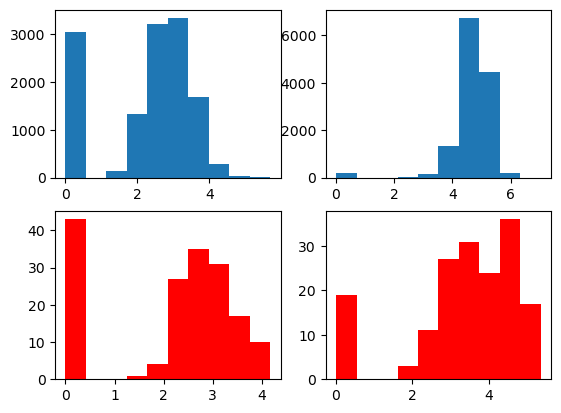

In [23]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(obs_data[:, 0])
axs[0, 1].hist(obs_data[:, 2])
axs[1, 0].hist(b2m_data[:, 0], color='red')
_ = axs[1, 1].hist(b2m_data[:, 2], color='red')

In [32]:
obs_data_cent = obs_data - obs_data.mean(axis=0)

In [33]:
b2m_data.std(axis=0)

array([1.35076493, 0.27123336, 1.43438899, 0.57417099, 0.65185934,
       1.22373799, 1.13910842, 1.35342653, 1.37653152, 0.94962468,
       1.46981513, 0.90265875, 1.35275132, 1.27338793, 0.8543487 ,
       1.28981213, 1.28209372, 0.58883364, 0.63089262, 0.8985343 ,
       0.4505661 , 0.91311169, 1.42362646, 0.5947215 , 1.28714299,
       1.26883561, 1.27623896, 1.07184669, 1.24687354, 1.32525902,
       0.56226679, 1.32019722, 0.58940607, 1.24761515, 1.2619307 ,
       0.55745304, 0.8130263 , 1.29347191, 1.20980449, 0.46099867,
       1.19850521, 0.17897846, 1.35106942, 1.37135192, 1.30646342,
       1.45254706, 0.85252696, 1.38077169, 1.37243477, 0.89969125,
       1.28038136, 1.04200766, 1.26619642, 1.07230801, 1.41598745,
       1.37603538, 0.54119139, 0.79979143, 1.36777045, 1.21083722,
       1.15708291])

In [35]:
obs_data_cent.mean(axis=0)

array([ 1.05757233e-14, -5.30623690e-16, -1.02542300e-14, -1.21662939e-14,
        6.83211245e-16, -9.73198086e-16, -8.54192518e-15,  1.73065370e-15,
        1.59726136e-14, -7.85147831e-17, -8.78787734e-15, -8.31780239e-16,
       -1.41553013e-16,  5.78961624e-15,  7.54971932e-16, -2.72444777e-15,
        2.90867957e-15,  8.26806538e-16, -5.19106562e-16, -2.42375321e-15,
       -5.03361789e-16, -9.62857856e-16,  1.37384819e-15, -7.12553336e-15,
       -1.67616474e-15, -8.57850459e-16,  2.51983963e-15,  1.19903073e-14,
        1.39545792e-15, -3.20036866e-15, -1.20663468e-16,  2.57241936e-15,
       -7.80731269e-15,  1.20480233e-14, -2.75077142e-15, -4.23358063e-16,
        1.09019812e-14,  2.75982757e-15, -1.43016190e-15, -7.13800246e-15,
        1.03659113e-15,  2.82058487e-16, -2.13576430e-15, -3.88145526e-15,
        9.54741114e-15,  3.44728389e-15,  9.19017479e-16,  2.17033311e-15,
        1.81920459e-15, -2.56798590e-14, -3.72167168e-15, -1.14502837e-16,
        3.58613357e-16,  